In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df = df.replace('yes',True)
df = df.replace('no', False)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,False,2343,True,False,unknown,5,may,1042,1,-1,0,unknown,True
1,56,admin.,married,secondary,False,45,False,False,unknown,5,may,1467,1,-1,0,unknown,True
2,41,technician,married,secondary,False,1270,True,False,unknown,5,may,1389,1,-1,0,unknown,True
3,55,services,married,secondary,False,2476,True,False,unknown,5,may,579,1,-1,0,unknown,True
4,54,admin.,married,tertiary,False,184,False,False,unknown,5,may,673,2,-1,0,unknown,True


In [22]:
df.loan.value_counts()

False    9702
True     1460
Name: loan, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  bool  
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  bool  
 7   loan       11162 non-null  bool  
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  bool  
dtypes: bool(4), int64(7), object(6)
memory usage: 1.1+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [8]:
def job_mean(job_name):
  job = df[df['job']== job_name]
  return job.balance.mean()

In [9]:
job_list = list(set(df['job']))
job_list

['admin.',
 'student',
 'unemployed',
 'blue-collar',
 'self-employed',
 'unknown',
 'housemaid',
 'technician',
 'services',
 'entrepreneur',
 'management',
 'retired']

In [10]:
job_balances = [job_mean(i) for i in job_list]
job_balances , job_list

([1195.8665667166417,
  1500.7833333333333,
  1314.719887955182,
  1203.9264403292182,
  1865.3728395061728,
  1945.4571428571428,
  1366.1605839416059,
  1556.2945693911136,
  1081.1711809317444,
  1621.9420731707316,
  1793.6636788776304,
  2417.2506426735217],
 ['admin.',
  'student',
  'unemployed',
  'blue-collar',
  'self-employed',
  'unknown',
  'housemaid',
  'technician',
  'services',
  'entrepreneur',
  'management',
  'retired'])

Text(0.5, 1.0, 'job balances')

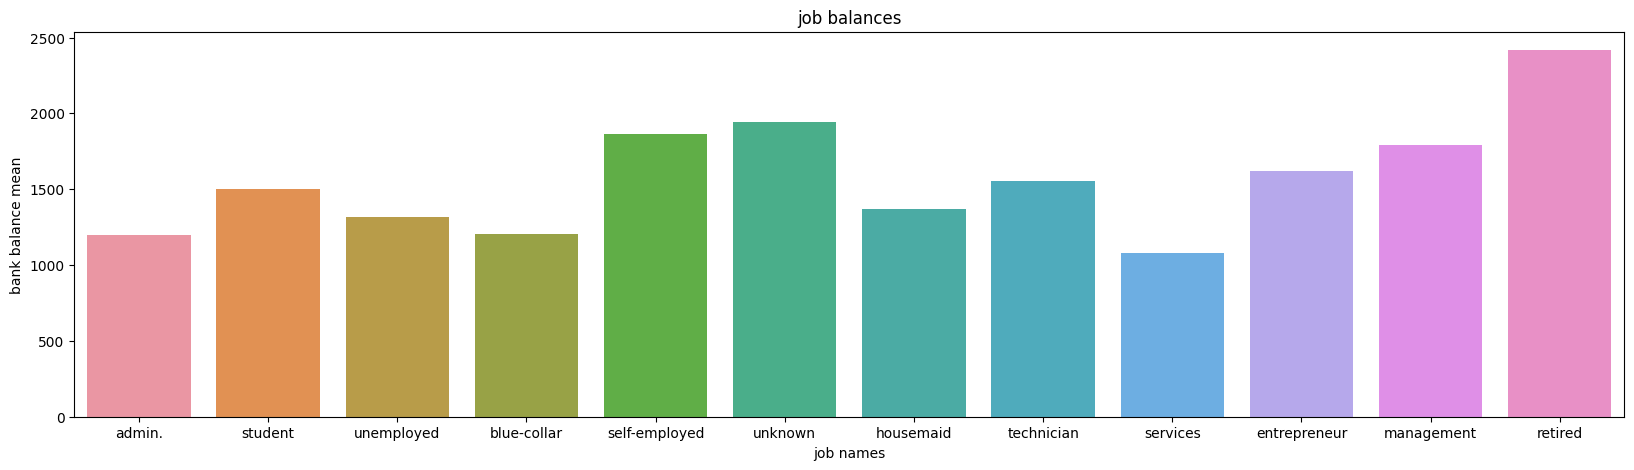

In [11]:
plt.figure(figsize = (20,5))
sns.barplot(x=job_list, y=job_balances)
plt.xlabel('job names')
plt.ylabel('bank balance mean')
plt.title('job balances')

Text(0.5, 1.0, 'age distribution')

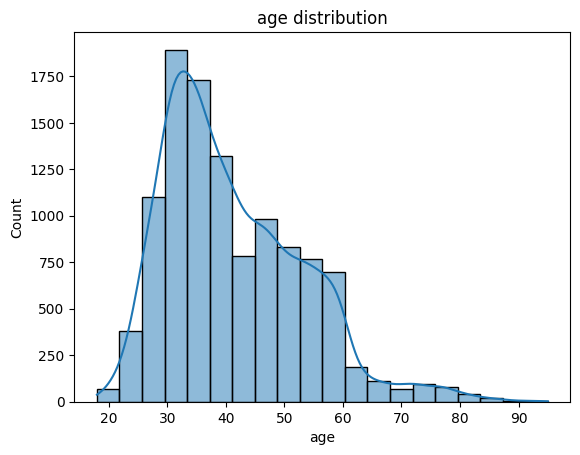

In [12]:
sns.histplot(x = df['age'],bins = 20,kde=True)
plt.title('age distribution')

In [13]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Text(0.5, 1.0, 'education balance')

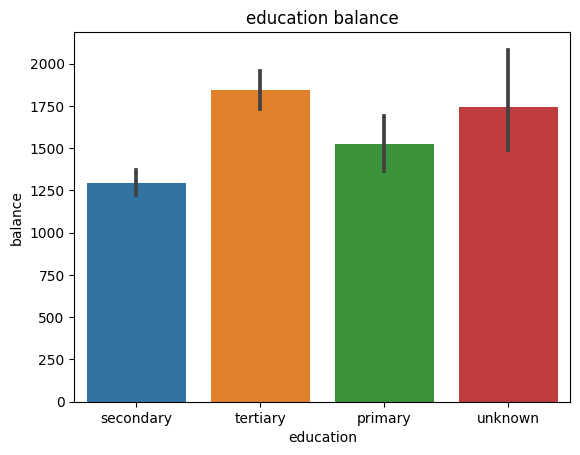

In [14]:
sns.barplot(x = df['education'],y=df['balance'])
plt.title('education balance')

In [15]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

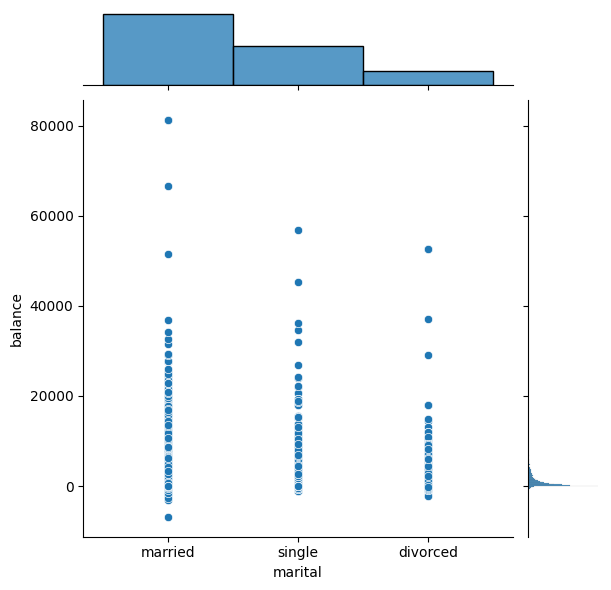

In [16]:
sns.jointplot(x = df['marital'] , y = df['balance'])

<Axes: xlabel='housing', ylabel='balance'>

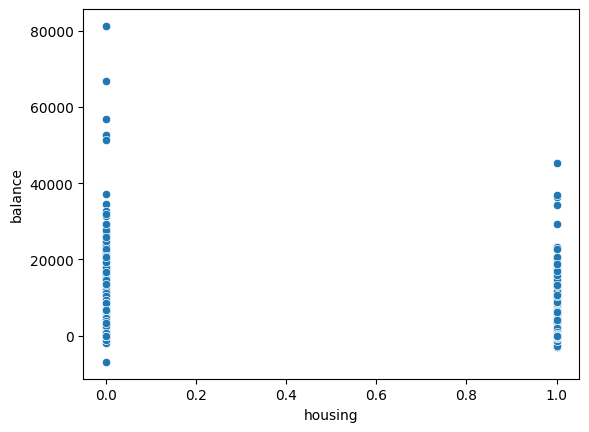

In [17]:
sns.scatterplot(data = df , x ='housing' ,y = 'balance')

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


<ipython-input-19-3cf56aa8377a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)


<Axes: >

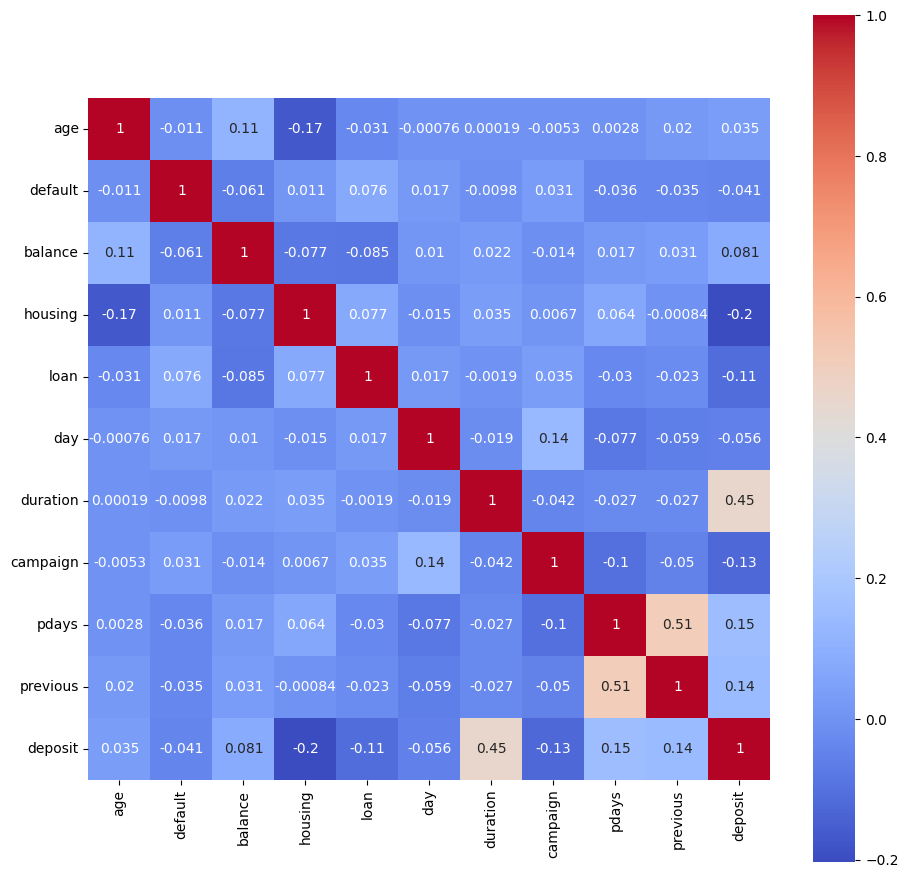

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)

<Axes: xlabel='deposit', ylabel='duration'>

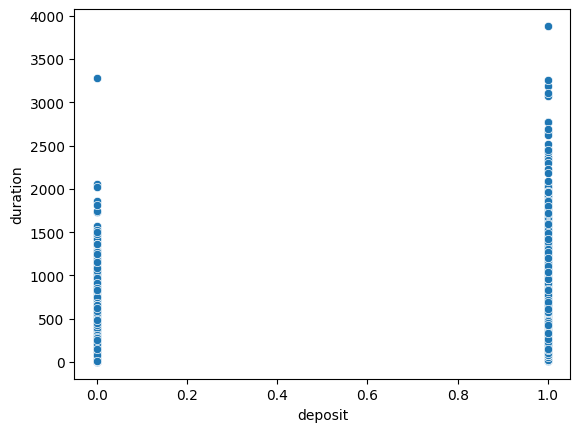

In [20]:
sns.scatterplot(x = df['deposit'] , y = df['duration'])

<Axes: xlabel='loan', ylabel='housing'>

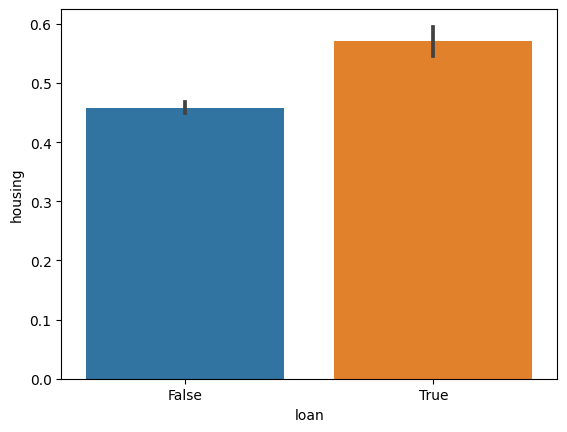

In [23]:
sns.barplot(x = df['loan'],y = df['housing'])